In [67]:
import csv
from past.builtins import raw_input
from pyparsing import col
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pandas as pd
from io import StringIO

df_train = pd.read_csv('scrapyProje/train.csv')


In [68]:
df_train.head(100)



,yildiz,Kategori,oyuncular,yonetmen
0,9.1,Aksiyon,"Bryce Dallas Howard, Oakes Fegley, Oona Lauren...",David Lowery
1,8.8,Aksiyon,"Donnie Yen, Jet Li, Li Gong, Yifei Liu",Niki Caro
2,9.0,Dram,"Aleksandr Samoylenko, Mariya Mironova, Pavel D...",Klim Shipenko
3,8.9,Bilim Kurgu,"Dacre Montgomery, Ludi Lin, Naomi Scott, RJ Cyler",Dean Israelite
4,8.7,Dram,"Douglas M. Griffin, James DuMont, Kurt Russell...",Peter Berg
...,...,...,...,...
95,9.3,Blu Ray,"Alfred Molina, Ben Kingsley, Gemma Arterton, J...",Mike Newell
96,9.3,Bilim Kurgu,"Hayden Christensen, Jamie Bell, Rachel Bilson,...",Doug Liman
97,8.9,Bilim Kurgu,"Carrie Fisher, Daisy Ridley, John Boyega, Mark...",Rian Johnson
98,9.6,Bilim Kurgu,"Cate Blanchett, Chris Hemsworth, Mark Ruffalo,...",Taika Waititi


In [69]:
df_train['category_id'] = df_train['Kategori'].factorize()[0]
category_id_df = df_train[['Kategori', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Kategori']].values)
df_train.head()





,yildiz,Kategori,oyuncular,yonetmen,category_id
0,9.1,Aksiyon,"Bryce Dallas Howard, Oakes Fegley, Oona Lauren...",David Lowery,0
1,8.8,Aksiyon,"Donnie Yen, Jet Li, Li Gong, Yifei Liu",Niki Caro,0
2,9.0,Dram,"Aleksandr Samoylenko, Mariya Mironova, Pavel D...",Klim Shipenko,1
3,8.9,Bilim Kurgu,"Dacre Montgomery, Ludi Lin, Naomi Scott, RJ Cyler",Dean Israelite,2
4,8.7,Dram,"Douglas M. Griffin, James DuMont, Kurt Russell...",Peter Berg,1


In [70]:
df_train['oyuncu_id'] = df_train['oyuncular'].factorize()[0]
oyuncu_id_df = df_train[['oyuncular', 'oyuncu_id']].drop_duplicates().sort_values('oyuncu_id')
oyuncu_to_id = dict(oyuncu_id_df.values)
id_to_oyuncu = dict(oyuncu_id_df[['oyuncu_id', 'oyuncular']].values)
df_train.head()


,yildiz,Kategori,oyuncular,yonetmen,category_id,oyuncu_id
0,9.1,Aksiyon,"Bryce Dallas Howard, Oakes Fegley, Oona Lauren...",David Lowery,0,0
1,8.8,Aksiyon,"Donnie Yen, Jet Li, Li Gong, Yifei Liu",Niki Caro,0,1
2,9.0,Dram,"Aleksandr Samoylenko, Mariya Mironova, Pavel D...",Klim Shipenko,1,2
3,8.9,Bilim Kurgu,"Dacre Montgomery, Ludi Lin, Naomi Scott, RJ Cyler",Dean Israelite,2,3
4,8.7,Dram,"Douglas M. Griffin, James DuMont, Kurt Russell...",Peter Berg,1,4


In [71]:
df_train.info()

len(df_train)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9061 entries, 0 to 9060
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yildiz       9061 non-null   float64
 1   Kategori     9061 non-null   object 
 2   oyuncular    9061 non-null   object 
 3   yonetmen     8997 non-null   object 
 4   category_id  9061 non-null   int64  
 5   oyuncu_id    9061 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 424.9+ KB


9061

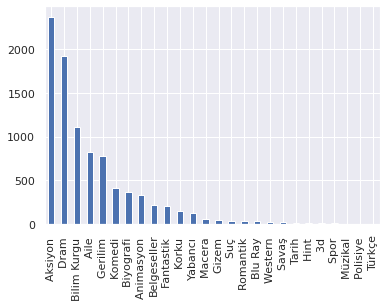

In [72]:
df_train['Kategori'].value_counts().plot(kind='bar')

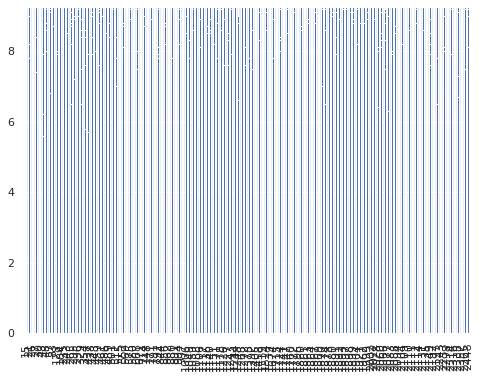

In [73]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_train.groupby('Kategori').yildiz.plot.bar(ylim=0)
plt.show()

In [74]:
import numpy as np


objectcol=['Kategori','oyuncular','yonetmen']
bilgiTablosu=df_train.describe(include=np.object)
bilgiTablosu



,Kategori,oyuncular,yonetmen
count,9061,9061,8997
unique,26,5443,3809
top,Aksiyon,"Hailee Steinfeld, Jason Drucker, John Cena, Jo...",Sam Liu
freq,2374,21,44


In [75]:
for nitelik1 in objectcol:
    x=bilgiTablosu.loc['count'][nitelik1]/9061
    if x<0.4:print(nitelik1)
        


In [76]:
objectcol=df_train.describe(include=np.object).columns
df_train[objectcol]=df_train[objectcol].fillna('missing')

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9061 entries, 0 to 9060
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yildiz       9061 non-null   float64
 1   Kategori     9061 non-null   object 
 2   oyuncular    9061 non-null   object 
 3   yonetmen     9061 non-null   object 
 4   category_id  9061 non-null   int64  
 5   oyuncu_id    9061 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 424.9+ KB


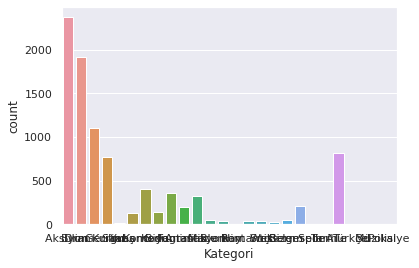

In [78]:
#yonetmen önemi
import seaborn as sns
sns.set(style='darkgrid')
sns.countplot(df_train['Kategori'])

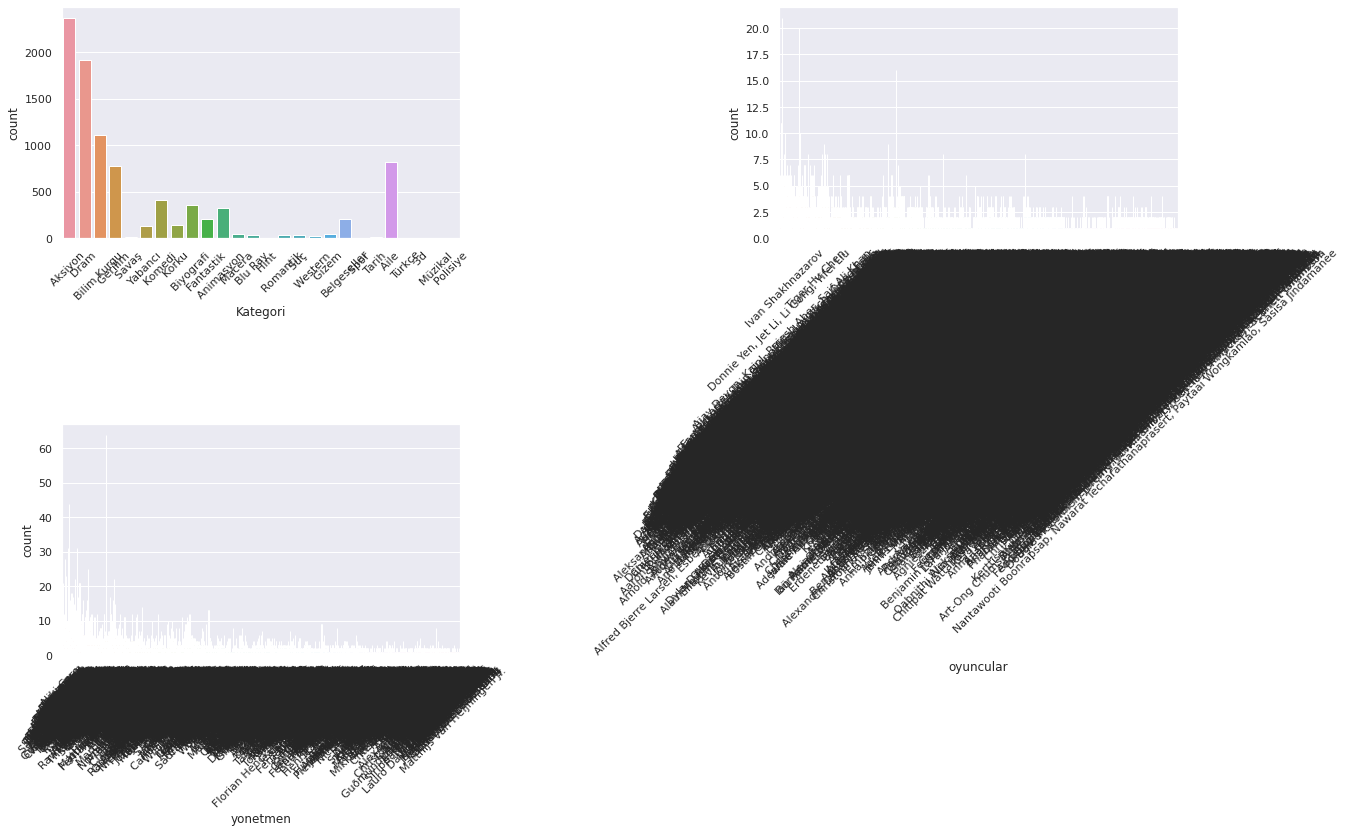

In [31]:
fig=plt.figure(figsize=(20,150))
fig.subplots_adjust(hspace=0.8,wspace=0.8)

for i in range(1,4):
    ax=fig.add_subplot(20,2,i)
    g=sns.countplot(df_train[objectcol[i-1]])
    plt.xticks(rotation=45)
    
    
    
    

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_train.oyuncular).toarray()
labels = df_train.category_id
print('oyuncu - kategori',features.shape)

features2 = tfidf.fit_transform(df_train.oyuncular).toarray()
labels2 = df_train.yildiz
print('oyuncu - yildiz',features2.shape)





oyuncu - kategori (9061, 5322)
oyuncu - yildiz (9061, 5322)


In [80]:
from sklearn.feature_selection import chi2

N = 2
for oyuncular, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(oyuncular))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    
 
    
    
    
    

# '3d ':
  . Most correlated unigrams:
. timberlake
. aykroyd
  . Most correlated bigrams:
. anna faris
. dan aykroyd
# 'Aile ':
  . Most correlated unigrams:
. lillard
. welker
  . Most correlated bigrams:
. welker grey
. frank welker
# 'Aksiyon ':
  . Most correlated unigrams:
. ismail
. gibson
  . Most correlated bigrams:
. gooding jr
. cuba gooding
# 'Animasyon ':
  . Most correlated unigrams:
. ori
. conroy
  . Most correlated bigrams:
. stuart allan
. kevin conroy
# 'Belgeseller':
  . Most correlated unigrams:
. johnson
. corey
  . Most correlated bigrams:
. johnson john
. corey johnson
# 'Bilim Kurgu ':
  . Most correlated unigrams:
. reynolds
. schwarzenegger
  . Most correlated bigrams:
. linda hamilton
. arnold schwarzenegger
# 'Biyografi ':
  . Most correlated unigrams:
. brühl
. hollander
  . Most correlated bigrams:
. daniel brühl
. tom hollander
# 'Blu Ray ':
  . Most correlated unigrams:
. cynthia
. nixon
  . Most correlated bigrams:
. harris jude
. kristin davis
# 'Dram

In [81]:
for oyuncular, yildiz in sorted(oyuncu_to_id.items()):
  features_chi2_1 = chi2(features2, labels2 == yildiz)
  indices_1 = np.argsort(features_chi2_1[0])
  feature_names_1 = np.array(tfidf.get_feature_names())[indices_1]
  unigrams_1 = [v for v in feature_names_1 if len(v.split(' ')) == 1]
  bigrams_1 = [v for v in feature_names_1 if len(v.split(' ')) == 2]
  print("# '{}':".format(oyuncular))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams_1[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams_1[-N:])))


# '50 Cent, AnnaLynne McCord, James Remar, Val Kilmer':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# '50 Cent, Arnold Schwarzenegger, Sylvester Stallone, Vincent D'Onofrio':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# '50 Cent, Bruce Willis, Rory Markham, Ryan Phillippe':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# '50 Cent, Dave Bautista, Jin Zhang, Sylvester Stallone':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# '50 Cent, Forest Whitaker, Malcolm Goodwin, Robert De Niro':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# '50 Cent, Gerard Butler, O'Shea Jackson Jr., Pablo Schreiber':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams

# 'Aaron Kwok, Feng Shao Feng, Li Gong, Shenyang Xiao':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aaron Marciniak, Ric Maddox, Richard O. Ryan, Shawn Parsons':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aaron Paul, Alan Rickman, Barkhad Abdi, Helen Mirren':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aaron Paul, Charles Baker, Jonathan Banks, Matt Jones':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aaron Paul, Dominic Cooper, Imogen Poots, Kid Cudi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aaron Paul, Kristen Harris, Mary Elizabeth Winstead, Scoot McNairy':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georg

# 'Abigail Breslin, Asa Butterfield, Hailee Steinfeld, Harrison Ford':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Abigail Breslin, Emma Stone, Woody Harrelson, Zoey Deutch':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Abigail Breslin, Isla Fisher, Johnny Depp, Timothy Olyphant':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Abigail Breslin, Jeff Goldblum, Jeremy Suarez, Leonard Nimoy':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Abigail Breslin, Joaquin Phoenix, Mel Gibson, Rory Culkin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Abigail Cruttenden, David Bradley, Neerja Naik, Sam Gittins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most 

# 'Adam Driver, Azhy Robertson, Julia Greer, Scarlett Johansson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adam Driver, Bill Murray, Chloë Sevigny, Tom Waits':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adam Driver, Channing Tatum, Daniel Craig, Farrah Mackenzie':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adam Driver, Daisy Ridley, Domhnall Gleeson, Keri Russell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adam Driver, Ismael Fritschi, José Luis Ferrer, Juan López-Tagle':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adam Driver, Joel Edgerton, Kirsten Dunst, Michael Shannon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlate

# 'Adam West, Burt Ward, Julie Newmar, William Shatner':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Addison Timlin, Ian Nelson, Jeremy Gardner, Larry Fessenden':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Addy Miller, Casper Van Dien, Eddie Jemison, Victoria Pratt':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adeel Akhtar, Rob Brydon, Rupert Graves, Thomas Turgoose':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adel Karam, Camille Salameh, Diamand Bou Abboud, Kamel El Basha':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adelaide Clemens, Derek Magyar, Lee Tergesen, Luke Evans':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bi

# 'Adrian Scarborough, Hong Chau, Josh Gad, Judi Dench, Nikesh Patel':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adrian Schiller, Amber Rose Revah, Diogo Morgado, Greg Hicks':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adrian Topol, Svetlana Ivanova, Tamara Mironova, Uwe Jellinek':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adrian Zaremba, Arkadiusz Jakubik, Michalina Labacz, Wasyl Wasylik':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adriana Altaras, Helge Schneider, Sylvester Groth, Ulrich Mühe':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Adriana Cataño, Armando Gutierrez, Carson Rowland, Kendall Vertes':
  . Most correlated unigrams:
. geo

# 'Agnes Bruckner, Dominic Monaghan, Jordan Belfi, Rick Gomez':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Agnes Bruckner, Sam Anderson, Shanna Collins, Shawn Ashmore':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Agnes Kittelsen, Allan Hyde, Jakob Oftebro, Søren Malling':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Agnieszka Grochowska, Benno Fürmann, Maria Schrader, Robert Wieckiewicz':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Agnieszka Podsiadlik, Malgorzata Gorol, Mateusz Kosciukiewicz, Roman Gancarczyk':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Agniya Ditkovskite, Deni Alasaniya, Lukerya Ilyashenko, Nikita Dyuvbanov':
  . Most correlate

# 'Aitana Sánchez-Gijón, Christian Bale, Jennifer Jason Leigh, John Sharian':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aitana Sánchez-Gijón, Dino Abbrescia, Giorgio Careccia, Riccardo Zinna':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aitor Merino, Kate Maberly, Paul Fox, Tom Hardy':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aj Benson, Daniel Ball, Gavin Andrus, Peggy Anger':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aja Evans, Connor Trinneer, James Kyson, Toni Trucks':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aja Naomi King, Amanda Plummer, Colm Feore, Lela Rochon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated b

# 'Alain Chanoine, Alyson Bath, Laci J Mailey, Terry Chen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alain Goulem, Anthony Lemke, David Patrick Green, Emmanuelle Vaugier':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alain Hernández, Aura Garrido, Ben Temple, Leticia Etala':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alain Lino Mic Eli Bastien, Rachel Mwanza, Ralph Prosper, Serge Kanyinda':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alain Moussi, Christopher Lambert, Jean-Claude Van Damme, Mike Tyson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alain Moussi, Christopher Lambert, Jean-Claude Van Damme, Mike Tyson, Sara Malakul Lane':
  . Most 

# 'Albert Allu, Darius Williams, Helen Audsley, Kate Rasmussen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Albert Benaiges, Dani Alves, Sergio Busquets, Éric Abidal':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Albert Cohen, Hana Laslo, Nitzan Sitzer, Ori Pfeffer':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Albert Delpy, Alexia Landeau, Chris Rock, Julie Delpy':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Albert Dupontel, Alice Taglioni, Sergi López, Stéphane Debac':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Albert Dupontel, Aurélien Recoing, Benoît Magimel, Marc Barbé':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigr

# 'Aleksandr Korshunov, Aleksey Kopashov, Andrey Merzlikin, Pavel Derevyanko':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aleksandr Kuznetsov, Aleksey Faddeev, Vasilisa Izmaylova, Yuriy Tsurilo':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aleksandr Kuznetsov, Kirill Pirogov, Mikhail Kremer, Roman Kolotukhin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aleksandr Pal, Pyotr Fyodorov, Sergey Puskepalis, Vitaliy Khaev':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aleksandr Robak, Aleksandra Bortich, Evgeniy Tsyganov, Vladimir Yaglych':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aleksandr Samoylenko, Mariya Mironova, Pavel Derevyanko, Vladimir Vdov

# 'Alex Macqueen, Emma Greenwell, Janie Dee, Tom Hughes':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alex McArthur, Dawn Olivieri, George Stults, Michael Shamus Wiles':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alex McTavish, David Hov, Elly Hiraani Clapin, Mikaela Franco':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alex Meraz, Dean Geyer, Michael Jai White, Todd Duffee':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alex Michaeletos, Campbell Scott, Hope Davis, Mary Makhatho':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alex Mills, Harry Lister Smith, Mark Arnold, Vanessa Grasse':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correla

# 'Alexander Petrov, Irina Starshenbaum, Viktor Dobronravov, Vinzenz Kiefer':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexander Polinsky, Corbin Allred, Kirby Heyborne, Larry Bagby':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexander Radszun, Ben Braun, Bernhard Schir, Claudia Hiersche':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexander Raye Pimentel, Christopher Diaz, Nicholas Winand, Zachary Greene':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexander Siddig, Joshua Jackson, Marisa Tomei, Oded Fehr':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexander Skarsgård, Brooklyn Decker, Liam Neeson, Rihanna':
  . Most correlated unigrams:

# 'Alexandria Lian, J.D. Hoppe, Joe Anderson, Joey Lawrence':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexandria Ocasio-Cortez, Cori Bush, Joe Crowley, Paula Jean Swearengin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexandru Potocean, Anamaria Marinca, Laura Vasiliu, Vlad Ivanov':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexi Kaye Campbell, Ashley Artus, Josef Altin, Joseph Muir':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexia Fast, Amanda Crew, Dustin Milligan, Richard de Klerk':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alexia Giordano, Guillaume de Tonquédec, Mehdi Kerkouche, Rayane Bensetti':
  . Most correlated unigrams:
. 

# 'Ali Suliman, Anthony Head, Jamie Dornan, Numan Acar':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ali Suliman, Doron Tavory, Hiam Abbass, Rona Lipaz-Michael':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ali Suliman, Mahmoud Al Atrash, Maisa Abd Elhadi, Mohammad Al Ibrahimi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ali Wong, James Saito, Michelle Buteau, Randall Park':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ali Zafar, Maya Ali, Mehmood Aslam, Nayyar Ejaz':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alia Shawkat, Anton Yelchin, Imogen Poots, Patrick Stewart':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
.

# 'Alicia Vikander, Jack Huston, Kiki Sukezane, Riley Keough':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alicia Vikander, Matt Damon, Tommy Lee Jones, Vincent Cassel':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alicia von Rittberg, David Kross, Friedrich Mücke, Karoline Schuch':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alicia von Rittberg, Emilia Schüle, Fahri Yardim, Jannis Niewöhner':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alicja Bachleda, Columbus Short, Jesse Spencer, Wilmer Valderrama':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alicja Bachleda, Enrico Lo Verso, F. Murray Abraham, Jerzy Skolimowski':
  . Most correlated unigrams:


# 'Alon Aboutboul, Julian Vergov, Scott Adkins, Teodora Duhovnikova':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alona Tal, Lauren Lapkus, Rob Riggle, Topher Grace':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alpay Aksum, Baris Akkoyun, Deniz Evrenol, Ece Bozkaya':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Alphonso McAuley, Christopher McDonald, Janet McTeer, Paz Vega':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Altan Erkekli, Ayda Aksel, Belçim Bilgin, Mehmet Günsür':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Althea Vega, Erin Panlilio, Jake Macapagal, John Arcilla':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigra

# 'Amarr M. Wooten, Darlene Love, Romany Malco, Sonequa Martin-Green':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amber Benson, Andrew Pleavin, Jonathan LaPaglia, Larry Drake':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amber Benson, Kevin Chamberlin, Mat Devine, Mieko Hillman':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amber Bongard, Hanna Binke, Jannis Niewöhner, Marvin Linke':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amber Goldfarb, Christa B. Allen, Inga Cadranel, Richard de Klerk':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amber Goldfarb, Eli Batalion, Kenneth Fernandez, Varun Saranga':
  . Most correlated unigrams:
. georgia
. óscar

# 'Amy Adams, James Marsden, Patrick Dempsey, Susan Sarandon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amy Adams, Jason Lee, Jim Belushi, Peter Dinklage':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amy Brassette, Christopher Berry, Michael Baird, Nicoye Banks':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amy Cater, Butch Midway, Jimstar, Rupert Owen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amy Davidson, Dante Basco, Jesse Head, Tia Texada':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Amy Hargreaves, Britne Oldford, Mark Blum, Matt McGorry':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. ge

# 'Anais L. Blake, Brielle Carter, Christian Cashmir, Quinton Aaron':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anais Lee, Charles Melton, John Leguizamo, Yara Shahidi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Analeigh Tipton, Jakob Cedergren, Marta Gastini, Valentin Merlet':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Analeigh Tipton, Jane Seymour, Jeremy Irons, Maria Bello':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anamaria Marinca, Daniel Brühl, Julie Delpy, William Hurt':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anand Upadhyaya, Casey Gooden, David Sullivan, Shane Carruth':
  . Most correlated unigrams:
. georgia
. óscar
  . Most c

# 'Andrea Osvárt, Christopher Papakaliatis, J.K. Simmons, Maria Kavoyianni':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrea Pino, Annie Clark, Claire Potter, Melinda Manning':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrea Riseborough, Bob Hoskins, Jaime Winstone, Sally Hawkins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrea Riseborough, James McAvoy, Mark Strong, Peter Mullan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrea Riseborough, Jeffrey Tambor, Simon Russell Beale, Steve Buscemi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrea Riseborough, Linus Roache, Ned Dennehy, Nicolas Cage':
  . Most correlated unigrams:
. georg

# 'Andrew Sensenig, Erin Cunningham, Ivan Sandomire, Jamie Jackson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrew Shaver, Bhasker Patel, Hannah Spearritt, Homayoun Ershadi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrew Simpson, Edward Hogg, Jane Brennan, Sarah Bolger':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrew Stock, Danny Sapani, Mark Strong, Richard Lukunku':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrew Tiernan, Jack Roth, Sophie Colquhoun, Tim Bentinck':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andrew Tiernan, Jouko Ahola, Mikko Leppilampi, Samuel Vauramo':
  . Most correlated unigrams:
. georgia
. óscar
  . Most c

# 'Andy Garcia, Camilla Belle, Colin Egglesfield, Juliette Lewis':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andy Garcia, Dafne Keen, Jeanne Tripplehorn, Luna Lauren Velez':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andy Garcia, Deborah Kara Unger, Forest Whitaker, Kim Coates':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andy Garcia, Karl Urban, Sofía Vergara, Vincent Spano':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andy Gates, Liesel Kopp, Shelly Cole, Steven Cole':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Andy Greenberg, Cindy Cohn, Joshua L. Dratel, Nicolas Christin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated

# 'Angelica Amor, Jeff Hause, Nicola Georgara, Sampson Dove':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Angelica Bolognesi Bonacini, Chloë Grace Moretz, Jim Cummings, Kimberlea Berg':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Angelina Jolie, Anthony Hopkins, Crispin Glover, Ray Winstone, Robin Wright':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Angelina Jolie, Anthony Hopkins, David Bedella, Jessie Kamm':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Angelina Jolie, Brad Pitt, Melvil Poupaud, Mélanie Laurent':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Angelina Jolie, Chiwetel Ejiofor, Daniel Olbrychski, Liev Schreiber':
  . Most correlated un

# 'Anjelica Huston, Clint Eastwood, Jeff Daniels, Wanda De Jesus':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anjelica Huston, Cree Summer, Ian James Corlett, Kelly Sheridan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anjelica Huston, Liam Neeson, Michael Wincott, Pierce Brosnan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anjorka Strechel, Sergey Garmash, Vladimir Mashkov, Yuliya Peresild':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anke Engelke, Bastian Pastewka, Karoline Herfurth, Milo Parker':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ann Benson, Clifford Bañagale, Lisa Alvillar, Paulina Alvarez':
  . Most correlated unigrams:
. georgia

# 'Anna Nicole Smith, Chyna, Gladise Jiminez, Lenise Sorén':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anna Paquin, Billy Boyd, Euan Mason, Gregor Selkirk':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anna Paquin, Goran Visnjic, Marcia Gay Harden, Nathaniel Parker':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anna Popplewell, Ayelet Zurer, Enisha Brewster, Thom Green':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anna Próchniak, Ingvar Sigurdsson, Marijana Jankovic, Steinunn Ólína Þorsteinsdóttir':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anna Reese, Dan Chupong, Jacqueline Apithananon, Jarunee Suksawas':
  . Most correlated unigrams:
. georgi

# 'Anne Heche, Colby Lopez, Dave Annable, Wesley Snipes':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anne Heche, David Schwimmer, Harrison Ford, Jacqueline Obradors':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anne Le Ny, Charlotte Le Bon, Guillaume Canet, Patrick d'Assumçao':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anne Schäfer, Lisa Tomaschewsky, Matthias Schweighöfer, Til Schweiger':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anne Sorce, Denise Poirier, Sean McGrath, Tabor Helton':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anne Winters, Nicolas Cage, Selma Blair, Zackary Arthur':
  . Most correlated unigrams:
. georgia
. óscar
  . Most

# 'Anthony LaPaglia, Brad Greenquist, Miranda Otto, Samara Lee':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anthony LaPaglia, Caitlin Gerard, Michelle Rodriguez, Tony Shalhoub':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anthony LaPaglia, Christina Hendricks, Edward Asner, James Denton':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anthony Mackie, Benjamin Walker, Dominic Cooper, Rufus Sewell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anthony Mackie, Brian Geraghty, Guy Pearce, Jeremy Renner':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Anthony Mackie, Bryan Cranston, Frank Langella, Melissa Leo':
  . Most correlated unigrams:
. georgia
. ósca

# 'Antonia Campbell-Hughes, Colin O'Donoghue, Laura Haddock, Noel Clarke':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Antonia Campbell-Hughes, Ed Speleers, Jan Bijvoet, Zoë Tapper':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Antonia Campbell-Hughes, Gale Harold, Leo Howard, Michelle Ryan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Antonia San Juan, Emilio Buale, Ivan Massagué, Zorion Eguileor':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Antonia Thomas, Craig Conway, John Lynch, Morjana Alaoui':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Antonia Thomas, Elliot James Langridge, James Lance, Steve Coogan':
  . Most correlated unigrams:
. georgi

# 'Aorere Paki, Caren Pistorius, Jeffrey Thomas, Kodi Smit-McPhee':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aphiradi Phawaphutanon, Caroline Ducey, Jon Foo, Michaël Cohen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Apollonia Pratt, Carmen Ejogo, Emma Greenwell, Theo Rossi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'April Billingsley, Conal Byrne, Kelsey Scott, Rhoda Griffis':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'April Telek, Ashley Williams, Brooke Smith, Sean Kleier':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aqueela Zoll, Faran Tahir, Matias Ponce, Robbie Kay':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated 

# 'Armand Assante, Jose Rosete, Kristanna Loken, Sanjar Madi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Armand Assante, Kippei Shîna, Shô Ikushima, Tony Schiena':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Armie Hammer, Brie Larson, Cillian Murphy, Sharlto Copley':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Armie Hammer, Christin Rankins, Karl Glusman, Zazie Beetz':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Armie Hammer, Geoffrey Rush, Sylvie Testud, Tony Shalhoub':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Armie Hammer, Jackie Earle Haley, Nate Parker, Penelope Ann Miller':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correla

# 'Asami, Ayano, Iona, Katrina Grey':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Asami, Hiroaki Iwanaga, Kirara Asuka, Ryûnosuke Kawai':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Asha Bhat, Lars Kjeldsen, Vidyut Jammwal, Vishwanath Chatterjee':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Asha Bhola, Christopher Gurusamy, Julia Koch, Narendran Pangathody':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Asher Angel, Jack Dylan Grazer, Mark Strong, Zachary Levi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ashish Vidyarthi, Brahmanandam, Nidhhi Agerwal, Ram Pothineni':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. geo

# 'Asia Argento, Marton Csokas, Samuel L. Jackson, Vin Diesel':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Asma Al Shiukhy, Freida Pinto, Hiam Abbass, Willem Dafoe':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Assad Ahmed, Gérard Depardieu, Isabelle Nanty, Mizanur Rahaman':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Astrea Campbell-Cobb, Emrhys Cooper, Johan Matton, Linnea Larsdotter':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Astrid Bergès-Frisbey, Brit Marling, Michael Pitt, Steven Yeun':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Astrid Bergès-Frisbey, Charlie Hunnam, Djimon Hounsou, Jude Law':
  . Most correlated unigrams:
. georgia
. ósc

# 'Ava Preston, Jack Fulton, Jaeden Noel, Tashiana Washington':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Avery Whitted, Laysla De Oliveira, Patrick Wilson, Will Buie Jr.':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Awie, Delimawati, Ropie Cecupak, Zul Ariffin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Axel Devillers, Baptiste Goy, Emmanuel Garijo, Tom Hudson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Axel Prahl, Denis Lyons, Georg Sulzer, Johannes Zeiler':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Aya Hisakawa, Masako Nozawa, Ryô Horikawa, Toshio Furukawa':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. 

# 'Barbara Alyn Woods, Brittany Underwood, Lexi Ainsworth, Tina Ivlev':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Barbara Crampton, Kayleigh Gilbert, Michael Paré, Rae Dawn Chong':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Barbara Dunkelman, Jacob Batalon, Robbie Kay, Seychelle Gabriel':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Barbara Goodson, Chris Jai Alex, Gavin Yap, Ogie Banks':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Barbara Mamabolo, John Ralston, Lindsey Haun, Virginia Madsen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Barbara Marten, Brooklynn Prince, Finn Wolfhard, Mackenzie Davis':
  . Most correlated unigrams:
. georgia
. 

# 'Batsheva Dance Company, Ben Schnetzer, Daniel Brühl, Zina Zinchenko':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bea Miller, Brian Cox, Josh Lucas, Lena Headey':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bea Palya, Bimbam Merstein, Cécile de France, Reda Kateb':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Beanie Feldstein, Jason Sudeikis, Jessica Williams, Kaitlyn Dever':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bear's Den, Ben Howard, Ben Lovett, Gill Landry':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Beau Bridges, Ludacris, Mark Wahlberg, Mila Kunis':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georg

# 'Ben Falcone, Dolly Wells, Melissa McCarthy, Richard E. Grant':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Feldman, Brandon Routh, Caity Lotz, Dane Cook':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Ferguson, Cam FitzPatrick, Mikkel Bang, Shin Biyajima':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Foster, Casey Affleck, Chris Pine, Eric Bana':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Foster, Chris Pine, Gil Birmingham, Jeff Bridges':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Foster, Christian Bale, Logan Lerman, Russell Crowe':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley

# 'Ben Whishaw, Brendan Gleeson, Chris Hemsworth, Cillian Murphy':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Whishaw, Cate Blanchett, Christian Bale, Heath Ledger':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Whishaw, Emily Beecham, Kerry Fox, Kit Connor':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Whishaw, Emily Blunt, Emily Mortimer, Lin-Manuel Miranda':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Whishaw, Hugh Bonneville, Hugh Grant, Sally Hawkins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ben Whishaw, Omar Elba, Sarita Choudhury, Tom Hanks':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. ge

# 'Benno Fürmann, Florian Lukas, Johanna Wokalek, Simon Schwarz':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Benoît Allemane, Jean-Claude Donda, Nathan Simony, Vincent Grass':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Benoît Brière, Bianca Gervais, Michel Courtemanche, Sonja Ball':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Benoît Magimel, Denis Ménochet, Diane Kruger, Djimon Hounsou':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Benoît Magimel, Mahdi Belemlih, Reem Kherici, Tewfik Jallab':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bente Fokkens, Jeroen van Koningsbrugge, Nino den Brave, Thekla Reuten':
  . Most correlated unigrams:
. georgia

# 'Bill Bray, Justin Dubé, Mark Underdown, Rheal Rees':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Camp, Daniel Henshall, Danielle Macdonald, Jamie Bell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Clinton, Katie Couric, Michael Bloomberg, Michele Simon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Duff, Gina Beretta, Jino Kang, Michael Bauld':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Engvall, DJ Qualls, Larry the Cable Guy, Michael Rose':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Evans, Corey Johnson, Katharine Bull, Peter Haeussler':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. ge

# 'Bill Pullman, Jeff Goldblum, Mary McDonnell, Will Smith':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Pullman, Kathy Baker, Peter Fonda, Stephen Alan Seder':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Sage, Caleb Steinmeyer, Daniel Stewart Sherman, Zulay Henao':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Skarsgård, Finn Wolfhard, Jaeden Martell, Sophia Lillis':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Smitrovich, Luke Bracey, Olga Kurylenko, Pierce Brosnan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bill Sorvino, Joseph D'Onofrio, Tracey Birdsall, Vincent Pastore':
  . Most correlated unigrams:
. georgia
. óscar
  . M

# 'Bingbing Fan, Eric Tsang, Jackie Chan, Johnny Knoxville':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bingbing Fan, Jet Li, Xiaoming Huang, Zhang Wen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bingbing Fan, Xiaoming Huang, Xueqi Wang, You Ge':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bingbing Li, Carina Lau, Chao Deng, Tony Ka Fai Leung':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bingbing Li, Charlene Choi, Daniel Wu, Louis Koo':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bingbing Li, Chun Wu, Kellan Lutz, Kelsey Grammer':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'B

# 'Bobby Campo, David Sakurai, Merritt Patterson, Samuel Hunt':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bobby Cannavale, Bobby Moynihan, Maya Rudolph, Will Arnett':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bobby Cannavale, Jack Gore, John Cena, Kate McKinnon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bobby Cannavale, John Leguizamo, Rosie Perez, Tyrese Gibson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bobby Coleman, Greg Kinnear, Liam Hemsworth, Miley Cyrus':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bobby Di Cicco, Eric Christmas, Michael Paré, Nancy Allen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigram

# 'Brad Garrett, Carlos Alazraqui, Dane Cook, Stacy Keach':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brad Greenquist, Brad Johnson, Keith Stone, Wendy Carter':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brad Leland, Brian Presley, Henry Thomas, Treat Williams':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brad McMurray, Holly Brisley, Manu Bennett, Steven Grives':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brad Pitt':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brad Pitt, Bruce Willis, Joseph Melito, Madeleine Stowe':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brad Pitt, Chi

# 'Brandon W. Jones, Cassi Thomson, Christa B. Allen, Maiara Walsh':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brandon Wardle, Brie Mattson, Christina July Kim, William Romano-Pugh':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brant Daugherty, Kimberly Daugherty, Lana McKissack, Ryan Merriman':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brea Grant, Christine Dwyer, Keli Price, Stephen Ellis':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brea Grant, Dylan Neal, Malcolm Stewart, Ty Olsson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Breanna Engle, Carmine Giordano, Hiram Ortiz, Kate Kenney':
  . Most correlated unigrams:
. georgia
. óscar
  . Mos

# 'Brian Bloom, Grant George, Jennifer Carpenter, John Eric Bentley':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brian Caspe, Cillian Murphy, Jamie Dornan, Karel Hermánek Jr.':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brian Cousins, Chris Browning, Danielle Bisutti, Shane Coffey':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brian Cox, Cian Boylan, Niamh Algar, Samuel Bottomley':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brian Cox, Franka Potente, Joan Allen, Matt Damon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brian Cox, James Purefoy, Jason Flemyng, Paul Giamatti':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigr

# 'Britt Irvin, Kelly Sheridan, Michael Kopsa, Rebecca Husain':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Britt Lower, Ryan Merriman, Sonja Sohn, William Gregory Lee':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Britt Robertson, George Clooney, Hugh Laurie, Raffey Cassidy':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brittany Allen, Hannah Emily Anderson, Joey Klein, Martha MacIsaac':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brittany Ashworth, Grégory Fitoussi, Javier Botet, Jay Benedict':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Brittany Beery, Deniz Akdeniz, Dragos Beldie, Ryan Guzman':
  . Most correlated unigrams:
. georgia
. óscar
  .

# 'Bruce Greenwood, Drake Cook, Kevin Costner, Shawn Driscoll':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bruce Greenwood, Emily Mortimer, James Badge Dale, Max Martini':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bruce Greenwood, Inbar Lavi, Justin Bartha, Sandrine Holt':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bruce Greenwood, Michelle Williams, Paul Dano, Will Patton':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bruce Greenwood, Rich Franklin, Tiffani Thiessen, Wendy Anderson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bruce Khan, Hee-soon Park, Jin-Seo Yoon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:

# 'Bryce Dallas Howard, Chris Pratt, Judy Greer, Ty Simpkins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bryce Dallas Howard, Chris Pratt, Justice Smith, Rafe Spall':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bryce Dallas Howard, Corey Stoll, Edgar Ramírez, Matthew McConaughey':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bryce Dallas Howard, Jamie Bell, Richard Madden, Taron Egerton':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bryce Dallas Howard, Oakes Fegley, Oona Laurence, Robert Redford':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Bryce Draper, Ignacia Allamand, Luke Massy, Natalie Burn':
  . Most correlated unigrams:
. georgia
. óscar


# 'Caio Blat, Felipe Camargo, João Miguel, Maiarim Kaiabi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Caitlin Aase, Melissa DuPrey, Sarah Mitchell, Travis Delgado':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Caitlin Carmichael, Frank Grillo, Garret Dillahunt, Shea Whigham':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Caitlin Glass, Haven Paschall, Ikue Ôtani, Sarah Natochenny':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Caitlin Halderman, Ciccio Manassero, Jefri Nichol, Marsha Aruan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Caitlin Keats, Madison Lawlor, Nick Chinlund, Scott Adkins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most

# 'Cameron Seely, Danny Glover, Denise Richards, Katrina Begin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Camila Amezcua, Connor Andrade, Dino Andrade, Rocco Amezcua':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Camila Mendes, Laura Marano, Noah Centineo, Odiseas Georgiadis':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Camilla Belle, Chris Evans, Colin Ford, Dakota Fanning':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Camilla Luddington, Enrico Colantoni, Jerry O'Connell, Rosario Dawson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Camille Balsamo, Lance Henriksen, Matt Winston, Reid Collums':
  . Most correlated unigrams:
. georgia
. óscar
  .

# 'Carly Barnes, Fergus Rattigan, Martin Ross, Philip Alexander Baker':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Carly Pope, Diora Baird, John Rhys-Davies, Samaire Armstrong':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Carly Pope, Gabriel Macht, Giancarlo Esposito, Robert Patrick':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Carlyn Burchell, Gustav Gerdener, Sharni Vinson, Steven John Ward':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Carme Calvell, Dani Rovira, Javier Balas, Michelle Jenner':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Carmen Aguirre, Matt Hamilton, Megan Hilty, Noah Mills':
  . Most correlated unigrams:
. georgia
. óscar
  .

# 'Casey Affleck, Danny Glover, Robert Redford, Sissy Spacek':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Casey Affleck, Kenneisha Thompson, McColm Cephas Jr., Rooney Mara':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Casey B. Dolan, Corey Feldman, Jamison Newlander, Tanit Phoenix Copley':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Casey Elliott, Corbin Allred, Larry Bagby, Travis Farris':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Casey Fitzgerald, Eric Roberts, Rib Hillis, Vernon Wells':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Casey Kasem, Frank Welker, Grey Griffin, Mindy Cohn':
  . Most correlated unigrams:
. georgia
. óscar
  . Most co

# 'Celia Imrie, Imelda Staunton, Joanna Lumley, Timothy Spall':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Celia Williams, Elizabeth Bochmann, Iris Cayatte, Norman MacCallum':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Celina Jade, Frank Grillo, Gang Wu, Jing Wu':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cem Arabacioglu, Hamdi Akden, Ismail Hakki Ürün, Mürsit Bag':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cem Davran, Demet Sener, Mehmet Ali Erbil, Sümer Tilmaç':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cem Yilmaz':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cemile Ilk

# 'Channing Tatum, Jamie Foxx, Jason Clarke, Maggie Gyllenhaal':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Channing Tatum, Luis Guzmán, Terrence Howard, Zulay Henao':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Channon Roe, Joe Manganiello, Ken Anderson, Yancey Arias':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chantal Lauby, Hakim Jemili, Michel Blanc, Solène Rigot':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chantelle Albers, Joey Rae Blair, Stephen Brown, Tara Erickson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chanté Adams, Germar Terrell Gardner, Mahershala Ali, Nia Long':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correl

# 'Charlie Cox, Jim Broadbent, Michael Caine, Michael Gambon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Charlie Day, Charlie Hunnam, Idris Elba, Rinko Kikuchi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Charlie Hunnam, Christopher Fairbank, Damijan Oklopdzic, Jason Ryan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Charlie Hunnam, Robert Pattinson, Sienna Miller, Tom Holland':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Charlie Murphy, Ed Skrein, James Norton, Tom Hopper':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Charlie Plummer, Dylan McDermott, Madisen Beaty, Samantha Mathis':
  . Most correlated unigrams:
. georgia
. óscar
  . Most corr

# 'Chase Williamson, Clancy Brown, Paul Giamatti, Rob Mayes':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chase Williamson, Jerry G. Angelo, Lauren Ashley Carter, Matt Mercer':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chasty Ballesteros, Joseph Gatt, Saïd Taghmaoui, Sean Astin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chaz Ebert, Gene Siskel, Martin Scorsese, Roger Ebert':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chazz Palminteri, Clive Standen, Samira Wiley, Theo Rossi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chazz Palminteri, Frank D'Amico, Peter Bogdanovich, Robert Davi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most c

# 'Chiwetel Ejiofor, Chris Pine, Margot Robbie':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chiwetel Ejiofor, Clive Owen, Julianne Moore, Michael Caine':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chloe Babcook, Lini Evans, Paul Johansson, Teri Polo':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chloe Brown, Jit Singh, Ron Arthurs, Sandra Hunter':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chloe Catherine Kim, Danielle Krivak, Hutch Dano, Jemma Dallender':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chloe Clark, Donny Boaz, Jason Gerhardt, Kelly Patton':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henle

# 'Chris Hemsworth, Isabel Lucas, Josh Hutcherson, Josh Peck':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chris Hemsworth, Kumail Nanjiani, Rebecca Ferguson, Tessa Thompson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chris Hemsworth, Leehom Wang, Viola Davis, Wei Tang':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chris Hemsworth, Michael Peña, Michael Shannon, Navid Negahban':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chris Hemsworth, Natalie Portman, Stellan Skarsgård, Tom Hiddleston':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chris Johnson, Kyle Gass, Penelope Mitchell, Sally Kirkland':
  . Most correlated unigrams:
. georgia
. óscar
  . 

# 'Christian Camargo, Harrison Ford, Peter Stebbings, Sam Spruell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christian Contreras, Mike Colter, Siennah Buck, Steven Waddington':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christian Gabriel, Christopher Fung, Laura Altair, Pano Tsaklas':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christian Howard, Mike Moh, Shogen, Togo Igawa':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christian McKay, Donald Sutherland, Helen Mirren, Janel Moloney':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christian Oliver, Erin Daniels, Heather Tom, Larisa Oleynik':
  . Most correlated unigrams:
. georgia
. óscar
  . Most

# 'Christopher Convery, Katie Holmes, Owain Yeoman, Ralph Ineson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christopher DeGress, Paco Ayala, Vanessa Bauche, Zyria Fernández De Lara':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christopher Denham, David Strathairn, Gugu Mbatha-Raw, Lorraine Toussaint':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christopher Egan, Hayden Christensen, Mischa Barton, Ryan Cartwright':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christopher Gerard, Karolina Benefield, Khamisa Wilsher, Valter Skarsgård':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Christopher Gorham, Jerry O'Connell, Rosario Dawson, Shemar Moore':
  

# 'Christopher Walken, Dakota Fanning, Denzel Washington, Radha Mitchell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chuck Getty, Curtis Caldwell, Daniel Kuttner, Tom Getty':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chuck Liddell, Danielle C. Ryan, Dolph Lundgren, Matthew Reese':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chuck Liddell, David Tom, Jesse Kove, Weston Cage Coppola':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chuck Liddell, Dolph Lundgren, Luke Goss, Mickey Rourke':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Chuck Norris, Ron Silver, Steven Keats, Toni Kalem':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlate

# 'Clark Gregg, Gattlin Griffith, Josh Brolin, Kate Winslet':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Clark Sarullo, Dante Walker, Jason Vail, Kellie Carroll':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Clark Sarullo, Isabelle Fuhrman, John Cusack, Samuel L. Jackson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Clarke Peters, Cynthia Erivo, Joe Alwyn, Leslie Odom Jr.':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Claude Duhamel, Jordan Danger, Martin Sensmeier, Ryan Carnes':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Claude Lorius, Jacques-Yves Cousteau, Michel Papineschi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated b

# 'Clu Gulager, James Andrews, Mark Duplass, Sarah Paulson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Clémence Poésy, Ed Harris, Edgar Ramírez, Jesse Eisenberg':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Clémence Poésy, Gilles Lellouche, Sami Bouajila, Vincent Elbaz':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cobie Smulders, Giovanni Ribisi, Guy Pearce, Kevin Corrigan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cocoa Brown, LaKeta Booker, Nick Arapoglou, Robert Browning':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cody Hackman, Dominic Purcell, Stephen Lang, Trish Stratus':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correla

# 'Common, Daniella De Jesús, John David Washington, Lorraine Toussaint':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Common, Gary Oldman, Gerard Butler, Linda Cardellini':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Common, Renée Zellweger, Sarah Jessica Parker, Simon Baker':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Conan Stevens, Daniel O'Neill, Gwion Jacob Miles, Praya Lundberg':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Connie Britton, Jesse Eisenberg, John Leguizamo, Kristen Stewart':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Connie Nielsen, Dougray Scott, Hermione Corfield, Olwen Fouéré':
  . Most correlated unigrams:
. georgia
. ósca

# 'Cory Booker, Dolores Canales, Melina Abdullah, Michelle Alexander':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cosma Shiva Hagen, Florentine Lahme, Gary Dourdan, Ken Duken':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cosmo Jarvis, Florence Pugh, Naomi Ackie, Paul Hilton':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Costas Mandylor, Johnny Strong, Kevin Phillips, Sean Patrick Flanery':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cote de Pablo, Dwight Yoakam, Jon Foster, Lizzy Caplan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Courteney Cox, Danny Glover, Kevin James, Sam Elliott':
  . Most correlated unigrams:
. georgia
. óscar
  . Most corr

# 'Cuba Gooding Jr., Norman Reedus, Ray Liotta, Tommy Flanagan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cuba Gooding Jr., Ray Winstone, Ron Perlman, Taryn Manning':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cung Le, Jean-Claude Van Damme, Johnny Holmes, Peter Weller':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cung Le, JuJu Chan, Marko Zaror, Scott Adkins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cung Le, Lucy Liu, RZA, Russell Crowe':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Cuong Seven, Lâm Vissay, Thiên Nguyen, Truong Ngoc Anh':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george

# 'Dal-su Oh, Jin-young Jung, Jung-min Hwang, Yunjin Kim':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dal-su Oh, Kyung-gu Sol, Nam-gil Kim, Seol-Hyun Kim':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dale Dickey, Kevin Carroll, Mariela Garriga, Seann William Scott':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dale Midkiff, Erin Cottrell, Frank McRae, Logan Bartholomew':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dallas Barnett, Kerry Glamsch, Renee Cataldo, Richard Alexander':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dallas Roberts, Dermot Mulroney, Frank Grillo, Liam Neeson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlate

# 'Daniel Brühl, David Oyelowo, Gugu Mbatha-Raw, John Ortiz':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel Brühl, Emma Watson, Michael Nyqvist, Richenda Carey':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel Brühl, Helen Mirren, Katie Holmes, Ryan Reynolds':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel Brühl, Jessica Chastain, Johan Heldenbergh, Timothy Radford':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel Brühl, John Malkovich, Thomas Kretschmann, Vera Farmiga':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel Brühl, Lluís Homar, Miguel Ángel Silvestre, Oriol Vila':
  . Most correlated unigrams:
. georgia
. óscar
  . Most

# 'Daniel Tiplady, Greg Kinnear, Kajsa Mohammar, Keira Knightley':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel Webber, Douglas Booth, Iwan Rheon, Machine Gun Kelly':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel Wu, Jackie Chan, Jinglei Xu, Naoto Takenaka':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel Wu, Qi Shu, Tony Yo-ning Yang, Ye Liu':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel Wu, Xun Zhou, You Ge, Ziyi Zhang':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daniel de Oliveira, Francisco Gaspar, Sergio Rubini, Thogun Teixeira':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley

# 'Danny Trejo, Deborah Twiss, Martin Kove, William DeMeo':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Danny Trejo, Dolph Lundgren, Johnny Messner, Vivica A. Fox':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Danny Trejo, Gary Daniels, John Edward Lee, Krystal Vee':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Danny Trejo, Gerrick Winston, John Tierney, Sarah Wheeldon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Danny Trejo, Hal Linden, Reno Wilson, Roxana Ortega':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Danny Trejo, Jake Busey, Shayla Beesley, Vinnie Jones':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgi

# 'Dave Sheridan, Kane Hodder, Laura Ortiz, Parry Shen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dave Wittenberg, Matthew Mercer, Val Tasso, Wendee Lee':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Daveed Diggs, Janina Gavankar, Jasmine Cephas Jones, Rafael Casal':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'David A.R. White, Hilty Bowen, James Denton, Michael Bailey Smith':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'David Ajala, Mike Noble, Thure Lindhardt, Vanessa Kirby':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'David Alan Basche, J.J. Johnson, Liza Colón-Zayas, Olivia Thirlby':
  . Most correlated unigrams:
. georgia
. óscar
  . Most co

# 'David Kross, Florian Lukas, Lachlan Nieboer, Stig Henrik Hoff':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'David Lenik, Dennis Farrin, Lee Bane, Rahel Kapsaski':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'David Lewis, Misha Collins, Peter Wingfield, Torri Higginson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'David Lynch, Ed Begley Jr., Harry Dean Stanton, Ron Livingston':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'David Mackey, Ken Stellingwerf, Lisa Varga, Toni Ann Rossi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'David Matranga, David Wald, Justin Doran, Luci Christian':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlat

# 'Dean Alexandrou, Hari Das Ahatefu, Michael Aston, Srisuwan Asuchewakamjohn':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dean Cain, Janine Turner, Michael Beach, Nick Searcy':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dean Chaumoo, Denise Gough, Louis Ashbourne Serkis, Tom Taylor':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dean Fujioka, Ryôsuke Yamada, Ryûta Satô, Tsubasa Honda':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dean Haglund, Lauren Birkell, Marina Sirtis, Tucker Smallwood':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dean Martin, Frank Sinatra, Peter Lawford, Sammy Davis Jr.':
  . Most correlated unigrams:
. georgia
. óscar
  . 

# 'Denise Metmer, Frédéric Diefenthal, Lorànt Deutsch, Marc Bretonnière':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Denise Richards, Dolph Lundgren, Jonathan Lipnicki, Peggy Miley':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Denise Richards, Erick Devine, Jamie Luner, Patrick Muldoon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Denise Richards, Pierce Brosnan, Robert Carlyle, Sophie Marceau':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Deniz Ozmen, Duru Ok, Nihan Okutucu':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dennis Boutsikaris, Laila Robins, Natalie Knepp, Santino Fontana':
  . Most correlated unigrams:
. georgia
. óscar
  . Most corre

# 'Diana Rigg, Gabriele Ferzetti, George Lazenby, Telly Savalas':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Diana Silvers, Juliette Lewis, McKaley Miller, Octavia Spencer':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Diane Guerrero, Elyes Gabel, Kevin Conroy, Susan Eisenberg':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Diane Guerrero, Emory Cohen, Liam Hemsworth, Zlatko Buric':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Diane Keaton, Ed Helms, John Goodman, Steve Martin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Diane Kruger, Jake Abel, Max Irons, Saoirse Ronan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
.

# 'Dolph Lundgren, Eric Keenleyside, Mike Dopud, Steve Austin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dolph Lundgren, Gianni Capaldi, Randy Couture, Vinnie Jones':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dolph Lundgren, James Chalke, Kristina Klebe, Tony Bentley':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dolph Lundgren, Jason Statham, Jet Li, Sylvester Stallone':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dolph Lundgren, Jean-Claude Van Damme, Mariah Bonner, Scott Adkins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Dolph Lundgren, Michael Jai White, Ron Perlman, Tony Jaa':
  . Most correlated unigrams:
. georgia
. óscar
  . Most cor

# 'Don Rickles, Jim Varney, Tim Allen, Tom Hanks':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Donald Bowen, Dylan Arnold, Marleik Mar Mar Walker, Tate Birchmore':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Donald Faison, Justin Long, Katia Winter, Tommy Flanagan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Donald Sutherland, Esther Purves-Smith, Kiefer Sutherland, Lex Cassar':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Donald Sutherland, Judy Greer, Liana Liberato, Luke Wilson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Donald Sutherland, Rodolfo Coria':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie h

# 'Drew Barrymore, Eugene Levy, Frank Welker, Will Ferrell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Drew Barrymore, Hugh Grant, Nick Bacon, Scott Porter':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Drew Casson, Georgia Bradley, Mark Cusack, Sam Carter':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Drew Fuller, Ivan Sergei, Krista Allen, Masiela Lusha':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Drew Gulak, Nick Mondo, Rory Gulak':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Drew Seeley, Isaac C. Singleton Jr., Randy Wayne, Sean Stone':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mack

# 'Eamon Hanson, Jehan Hashim, Matt Daciw, Melissa Joy Boerger':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ebon Moss-Bachrach, Elisabeth Moss, Rogerio Igarashi Vaz, Shusaku Kakizawa':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ebon Moss-Bachrach, James McCaffrey, Robert Forster, Zoë Bell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ece Erisli, Mustafa Oral, Sebnem Ünaldi, Sude Eldem':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Echo Kellum, Iddo Goldberg, Megalyn Echikunwoke, Sunil Malhotra':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ed Begley Jr., Marilu Henner, Virginia Kull, Zach McGowan':
  . Most correlated unigrams:
. georgia
. óscar
 

# 'Edward Furlong, Gralen Bryant Banks, Megan Adelle, Paul Boocock':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Edward Hogg, Jessica Barden, Jodhi May, Jordan Bolger':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Edward James Olmos, Esai Morales, John Heard, Laurence Fishburne':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Edward James Olmos, Harrison Ford, Rutger Hauer, Sean Young':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Edward Norton, Jeremy Renner, Rachel Weisz, Scott Glenn':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Edward Norton, Jessica Biel, Paul Giamatti, Rufus Sewell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correla

# 'Eliott Margueron, Nino Rocher, Pierre Martial Gaillard, Théo Chazal':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Elisa Lasowski, James Ransone, Mark Caven, William Gaunt':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Elisabeth Gray, Justin Felbinger, Lindsey Alena, Stephen Hughes':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Elisabeth Moss, Jonah Hill, Rose Byrne, Russell Brand':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Elisabeth Moss, Lupita Nyong'o, Tim Heidecker, Winston Duke':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Elisabeth Röhm, Paul Nicholls, Poppy Lee Friar, Yancy Butler':
  . Most correlated unigrams:
. georgia
. óscar
  . Most

# 'Elle-Máijá Tailfeathers, Forrest Goodluck, Kiowa Gordon, Michael Greyeyes':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ellen Barkin, Joe Anderson, Odette Annable, Rob Corddry':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ellen Burstyn, Hugh Jackman, Rachel Weisz, Sean Patrick Thomas':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ellen Page, Jesse Eisenberg, Penélope Cruz, Woody Allen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ellen Page, Joseph Gordon-Levitt, Ken Watanabe, Leonardo DiCaprio':
  . Most correlated unigrams:
. johnson
. corey
  . Most correlated bigrams:
. johnson john
. corey johnson
# 'Ellen Page, Julianne Moore, Michael Shannon, Steve Carell':
  . Most correlated unigrams:
. georgia
. óscar
 

# 'Emma Caulfield Ford, Kali Rocha, Katherine Von Till, Scott Holroyd':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Emma Choy, Jack Bailey, Karen Admiraal, Terry Cole':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Emma Fuhrmann, Josh Duhamel, Josh Wiggins, Lynn Collins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Emma Gilmour, Lena Headey, Steve Coogan, Susan Jane Tanner':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Emma Hamilton, Mark Coles Smith, Michael Caton, Ningali Lawford':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Emma Holzer, Joanna David, Kyle Gallner, Ryan Guzman':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bi

# 'Eric Godon, Kristin Scott Thomas, Margot Robbie, Michelle Williams':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Eric Johnson, Hannah Gross, Marie-Josée Croze, Tuppence Middleton':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Eric Lively, Michelle Rodriguez, Oliver Hudson, Taryn Manning':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Eric Mabius, Milla Jovovich, Oded Fehr, Sienna Guillory':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Eric Roberts, Garrett Hines, Leticia Jimenez, Patrick Flanagan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Eric Roberts, Gregg Christie, Natalie Schneider, Torrei Hart':
  . Most correlated unigrams:
. georgia
. ósc

# 'Ethan Hawke, Josh Charles, Robert Sean Leonard, Robin Williams':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ethan Hawke, Paul Anderson, Qing Xu, Rutger Hauer':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ethan Peck, Kat Graham, Quincy Brown, Ron Cephas Jones':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ethan Taylor, Lucy-Jane Quinlan, Philip Ridout, Robert Nairne':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Eugene Byrd, Johnny Messner, KaDee Strickland, Morris Chestnut':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Eugene Simon, Gretchen Egolf, Martyn Ford, Simone Ashley':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bi

# 'Famke Janssen, Jeffrey Dean Morgan, Naomi Battrick, Ruairi O'Connor':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Famke Janssen, Kevin Durand, LaMonica Garrett, Nicolas Cage':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Famke Janssen, Leland Orser, Liam Neeson, Maggie Grace':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Fan Liao, Jia Song, Shih-Chieh King, Wenli Jiang':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Fan Liao, Jiali Ding, Tao Zhao, Yi'nan Diao':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Fanny Bloc, Marie Facundo, Nathalie Benaumé, Thierry Kazazian':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. geo

# 'Francesca Eastwood, Jonathan Rhys Meyers, Malik Yoba, William Forsythe':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Francesca Hayward, Idris Elba, Laurie Davidson, Taylor Swift':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Francisco Barreiro, Nacho Vigalondo, Sheila Vand, Zoë Bell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Franck Gastambide, Louane Emera, Omar Sy, Vincent Lacoste':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Franco Nero, José Bódalo, José Canalejas, Loredana Nusciak':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Frank Chiesurin, Katie O'Grady, Rachel MacMillan, Xander Steel':
  . Most correlated unigrams:
. georgia
. óscar
 

# 'Friedrich von Thun, Jenny Melina Witez, Noah Levi, Senta Berger':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Friedrich von Thun, Sammy Sheik, Tobias Moretti, Violetta Schurawlow':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Fritzi Haberlandt, Ivo Pietzcker, Sebastian Koch, Thomas Schubert':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Frode Winther, Marit Synnøve Berg, Morten Larsen, Tov Sletta':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Frédéric Pierrot, Kristin Scott Thomas, Mélusine Mayance, Niels Arestrup':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Fumika Shimizu, Hiyori Sakurada, Masataka Kubota, Nobuyuki Suzuki':
  . Most correlated u

# 'Gary Stretch, James Russo, Katherine Randolph, Lance Henriksen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gaspard Ulliel, Grégoire Leprince-Ringuet, Lambert Wilson, Mélanie Thierry':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gaspard Ulliel, Isabelle Huppert, Julia Roy, Marc Barbé':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gaspard Ulliel, Jean Reno, Sami Bouajila, Vahina Giocante':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gaspard Ulliel, Lily-Rose Depp, Mélanie Thierry, Soko':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Geena Davis, Hana Colley, Hannah Gross, Stephanie Andujar':
  . Most correlated unigrams:
. georgia
. óscar
  . Most

# 'Gerry Robert Byrne, Jim Carrey, Kate Winslet, Tom Wilkinson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Geza Weisz, Kee Ketelaar, Peter Paul Muller, Sasha Mylanus':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Giancarlo Esposito, Grace VanderWaal, Graham Verchere, Maximiliano Hernández':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gianni Vastarella, Giuseppe Aiello, Marco D'Amore, Salvatore D'Onofrio':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gig Young, Isela Vega, Robert Webber, Warren Oates':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gigi Saul Guerrero':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. geor

# 'Graham Rogers, Justin McCammom, Tim Roth, Ty Parker':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Grant Bowler, Jamie Bamber, Micah Balfour, Nina Bergman':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Grant Durazzo, Jayden Isabel, Kellen Goff, Nina Herzog':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Grant Masters, Laura Fraser, Mel Raido, Sid Phoenix':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gray Powell, Rachael Taylor, Robbie Amell, Shaun Benson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Greg Bryk, Peter Outerbridge, Robbie Amell, Stephen Amell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henl

# 'Géza Röhrig, Levente Molnár, Todd Charmont, Urs Rechn':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Géza Röhrig, Matthew Broderick, Sammy Voit, Sarah Jes Austell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gô Ayano, Mamoru Miyano, Minami Hamabe, Takeru Satoh':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gökçe Bahadir, Sacide Tasaner, Yigit Özsener, Çetin Tekindor':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gökçe Bosda, Kenan Bal, Rahmi Dilligil, Taki Akbulut':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Gülseven Yilmaz, Kayra Simur, Taner Ertürkler, Ufuk Asar':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. g

# 'Hannu-Pekka Björkman, Maria Heiskanen, Matleena Kuusniemi, Tiina Weckström':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hanyu Zhang, Ji-won Ha, Masaharu Fukuyama, Stephy Qi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hao Chen, Joseph, Mo Han, Yanting Lü':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hao Qin, Shôta Sometani, Xuan Huang, Yuqi Zhang':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hardy Jones, Louie Psihoyos, Michael Illiff, Richard O'Barry':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hari Dhillon, Jeremy Sumpter, Phoebe Tonkin, Sebastian Koch':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie

# 'Hendrik Toompere Sr., Liisa Koppel, Märt Avandi, Ursula Ratasepp':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Henning Baum, Michael Herbig, Shirley MacLaine, Uwe Ochsenknecht':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Henrik Rafaelsen, Liv Bernhoft Osa, Per Frisch, Trond Nilssen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Henry Cavill, John Hurt, Mickey Rourke, Stephen Dorff':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Henry Cavill, Simon Pegg, Tom Cruise, Ving Rhames':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Henry Czerny, Jason Statham, Ryan Phillippe, Wesley Snipes':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlat

# 'Hsiao-Hung Pai, Nick Broomfield':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hugh Bonneville, Noel Clarke, Sam Claflin, Timothy Spall':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hugh Dillon, Jakob Davies, Nicolas Cage, Sarah Lind':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hugh Grant, Meryl Streep, Rebecca Ferguson, Simon Helberg':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hugh Jackman, Ian McKellen, James McAvoy, Patrick Stewart':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Hugh Jackman, J.K. Simmons, Mark O'Brien, Vera Farmiga':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george macka

# 'Idris Elba, Naomie Harris, Robert Hobbs, Terry Pheto':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ifan Huw Dafydd, James Groom, Julian Gillard, Oliver Coles':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ignacio Serricchio, Josh Cooke, Mattie Liptak, Mercedes Mason':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Igor Sergeev, Viktor Sukhorukov, Yuliya Aug, Yuriy Tsurilo':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ike Barinholtz, John Cena, Kathryn Newton, Leslie Mann':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ikki Sawamura, Kôji Yakusho, Takayuki Yamada, Yûsuke Iseya':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigra

# 'J.J. Abrams, Noam Chomsky, Paul Brennan, Peter Berg':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'J.K. Simmons, Jerrod Carmichael, Rose Byrne, Susan Sarandon':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'J.K. Simmons, John Goodman, Mark Wahlberg, Michelle Monaghan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'J.K. Simmons, Julian Atocani Sanchez, Keanu Wilson, Noel Gugliemi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'J.K. Simmons, Melissa Benoist, Miles Teller, Paul Reiser':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'JP Karliak, Jess Harnell, Lincoln Melcher, Mick Wingert':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated 

# 'Jaime López, Luis Callejo, Luis Tosar, Vicente Romero':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jaime Murray, Jennifer Marshall, Nicholas Brendon, Schuyler Fisk':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jake Busey, Kelli Berglund, Olivia Larsen, Royce Johnson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jake Gyllenhaal, Jeffrey Wright, Michelle Monaghan, Vera Farmiga':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jake Gyllenhaal, Joaquin Phoenix, John C. Reilly, Riz Ahmed':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jake Gyllenhaal, Marisa Tomei, Samuel L. Jackson, Tom Holland':
  . Most correlated unigrams:
. georgia
. óscar
  . Most 

# 'Jamie Bell, Kate Mara, Michael B. Jordan, Miles Teller':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jamie Campbell Bower, Jemima West, Lily Collins, Robert Sheehan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jamie Campbell Bower, Martijn Lakemeier, Raymond Thiry, Yorick van Wageningen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jamie Cymbal, Jo Mousley, Pushpinder Chani, Sid Akbar Ali':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jamie Foxx, Jessica Biel, Josh Lucas, Sam Shepard':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jamie Harris, Jay Rodan, Phil McKee, Ricky Schroder':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correl

# 'Jason Momoa, Ron Perlman, Rose McGowan, Stephen Lang':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jason O'Mara, Jennifer Morrison, Sachie Alessio, Stuart Allan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jason O'Mara, Morena Baccarin, Stuart Allan, Thomas Gibson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jason O'Mara, Sean Maher, Stuart Allan, Yvonne Strahovski':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jason Patric, Jeff Daniel Phillips, Penelope Mitchell, Toby Kebbell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jason Stange, Katie Hemming, Lisa van Dam-Bates, Travis Johnny Ware':
  . Most correlated unigrams:
. georgia
. óscar
  . 

# 'Jeff Goldblum, Julianne Moore, Pete Postlethwaite, Vince Vaughn':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeff Goldblum, Laura Dern, Richard Attenborough, Sam Neill':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeff Pearson, Kelsey Thomas, Megan Simon, Rachel DeRouen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeffory Asselin, Nina Deasley, Tim Christian, Wayne Davies':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeffrey Ballard, Luke Goss, Michael Eklund, Tyler Johnston':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeffrey Combs, Kiefer O'Reilly, Michelle O'Reilly, Tyler Nicol':
  . Most correlated unigrams:
. georgia
. óscar
  . Most co

# 'Jeremy Renner, Julia Jones, Kelsey Asbille, Teo Briones':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeremy Renner, Paula Patton, Simon Pegg, Tom Cruise':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeremy Renner, Rebecca Ferguson, Simon Pegg, Tom Cruise':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeremy Shada, John Cena, Jon Heder, Melissa Sturm':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeremy Stutes, Julie Condra, Mark Dacascos, Noelani Dacascos':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jeremy Suarez, Mandy Moore, Patrick Dempsey, Rick Moranis':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie 

# 'Ji-won Ha, Kyung-gu Sol, Uhm Junghwa, Ye-won Kang':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jianbin Chen, Quan Ren, Xun Zhou, Yun-Fat Chow':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jiiva, Radha Ravi, Sathish, Shalini Pandey':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jill Wagner, Kristoffer Polaha, Naomi Sequeira, Rob Kipa-Williams':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jim Caviezel, Juliet Mills, Matt Dillon, Ryan Potter':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jim Cummings, Keith Szarabajka, Kevin Michael Richardson, Nika Futterman':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie h

# 'Joey Fatone, Karen Slater, Loukia Ioannou, Morgan Neundorf':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Joey Morgan, Logan Miller, Sarah Dumont, Tye Sheridan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Joey Starr, Julien Boisselier, Serge Riaboukine, Tomer Sisley':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'John Abraham, Nishikant Kamat, Sharad Kelkar, Teddy Maurya':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'John Bariamis, Lonnie Cayetano, Matt Candito, Nicola Bertram':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'John C. Reilly, Nina Arianda, Shirley Henderson, Steve Coogan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correl

# 'Johnny Messner, Richard Tyson, Steven Seagal, Vernon Wells':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Joi Johannsson, Stefán Hallur Stefánsson, Thora Bjorg Helga, Ólafur Darri Ólafsson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Joivan Wade, Lex Scott Davis, Steve Harris, Y'lan Noel':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jol Sparks, Joshua Calles, Ruby Grubb, Wayne Hapi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jon Abrahams, Kevin Pollak, Megan West, Mena Suvari':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jon Bernthal, Lake Bell, Nikolaj Coster-Waldau, Omari Hardwick':
  . Most correlated unigrams:
. georgia
. óscar
  . Most c

# 'Jovan Adepo, Mathilde Ollivier, Pilou Asbæk, Wyatt Russell':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'João Vilas, Maria Leite, Mário Oliveira, Pedro Barão Dias':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Juan Cano, Laure Calamy, Noée Abita, Tamara Cano':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Juan Catalan, Melissa Catalan, Miguel Catalan, Tasha Boggs':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Jud Charlton, Kal Weber, Lucy Cudden, Simon Callow':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Judd Nelson, Kim Coates, Michelle Harrison, Trace Adkins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie 

# 'Kana Hanazawa':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kane Kosugi, Markus Waldow, Mika Hijii, Scott Adkins':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kane Kosugi, Rila Fukushima, Rinko Kikuchi, Shun Oguri':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kanna Hashimoto, Kento Yamazaki, Masami Nagasawa, Ryô Yoshizawa':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kanna Hashimoto, Masaki Suda, Shun Oguri, Yûya Yagira':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kanokkorn Jaicheun, Seigi Ozeki, Sorapong Chatree, Winai Kraibutr':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'K

# 'Kelly Blatz, Lew Temple, Marci Miller, Rosa Blasi':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kelly Clarkson, Kelly Donohue, Rachel Crow, Ryan Crego':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kelly Sheridan, Kira Tozer, Tim Curry, Willow Johnson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ken Lo, Ocean Wang, Xingtong Yao, Zoe Zhang':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ken Watanabe, Kyle Chandler, Millie Bobby Brown, Vera Farmiga':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Ken Yung, Kj Schrock, Thomas Carr, Todd Quills':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george macka

# 'Konstantin Bogomolov, Sergey Garmash, Stanislav Kisilevskiy, Yuriy Borisov':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kris Kristofferson, Leonor Varela, Ron Perlman, Wesley Snipes':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kris Kristofferson, N'Bushe Wright, Stephen Dorff, Wesley Snipes':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kristen Stewart, Lane Garrison, Payman Maadi, Tara Holt':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kristen Stewart, Nicholas Hoult, Scott Lawrence, Vernetta Lopez':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Kristen Stewart, Peter Facinelli, Robert Pattinson, Taylor Lautner':
  . Most correlated unigrams:
.

# 'Lei Zhang, Wenlun Wu, Zijie Lin, Zirong Tong':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Leilani Sarelle, Lisa Langlois, Sonia Curtis, Vernon Wells':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Len Kabasinski, Leo Fong, Lisa Neeld, Tim O'Hearn':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Lene Maria Christensen, Mia Lyhne, Nicolas Bro, Ulrich Thomsen':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Leonardo Arivelo, Michael Darlinger, Peter Dinklage, Rosalie Thomass':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Leroy Kincaide, Maurizio Corigliano, Nancy Becker, Sharon Fryer':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bi

# 'Luke Macfarlane, Maureen McCormick, Michael Madsen, Tatum O'Neal':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Luke Moran, Omid Abtahi, Sara Paxton, Sean Astin':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Luke Treadaway, Mathew Baynton, Natalia Tena, Rebecca Benson':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Lynn Collins, Samantha Morton, Taylor Kitsch, Willem Dafoe':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Lynn Whitfield, Lyriq Bent, Ricky Whittle, Sanaa Lathan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Lynne Koplitz':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Lár

# 'Martin Sheen, Richard Gere, Tamer Hassan, Topher Grace':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Marwan Kenzari, Mena Massoud, Naomi Scott, Will Smith':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Mary McCormack, Rory Cochrane, Scotty Noyd Jr., Tony Perez':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Mary Stuart Masterson, Miles Robbins, Patrick Schwarzenegger, Sasha Lane':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Masasa Mbangeni, Mbulelo Grootboom, Michael Kenneth Williams, Sizo Mahlangu':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Mathis Landwehr, Mike Möller, Oliver Juhrs, Volkram Zschiesche':
  . Most correlated unigrams:
. georgia


# 'Michel Beaudry, Patrice Bélanger, Pierre Boudreau, Sarain Boylan':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Michelle Monaghan, Philip Seymour Hoffman, Tom Cruise, Ving Rhames':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Michelle Rodriguez, Milla Jovovich, Oscar Pearce, Ryan McCluskey':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Michelle Rodriguez, Sam Worthington, Sigourney Weaver, Zoe Saldana':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Michelle Williams, Riz Ahmed, Scott Haze, Tom Hardy':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Michiyo Yasuda, Tadanobu Asano, Takeshi Kitano, Yui Natsukawa':
  . Most correlated unigrams:
. georgia
. 

# 'Patrick Moore, Paul Watson, Rex Weyler, Robert Hunter':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Patrick Shai, Rachel Shelley, Scott Bairstow, Warrick Grier':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Paul Bettany, Sam Claflin, Stephen Graham, Tom Sturridge':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Paul Julian':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Paul Michael Glaser, Roger Rose, Ryan McPartlin, Yvonne Strahovski':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Paula Beer, Sam Riley, Thomas Schubert, Tobias Moretti':
  . Most correlated unigrams:
. georgia
. óscar
  . Most correlated bigrams:
. georgie henley
. george mackay
# 'Pa

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

df_train['yildiz'] = df_train['yildiz'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(df_train['oyuncular'], df_train['Kategori'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)



X2_train, X2_test, y2_train, y2_test = train_test_split(df_train['oyuncular'], df_train['yildiz'], random_state = 0)

X2_train_counts = count_vect.fit_transform(X2_train)

X2_train_tfidf = tfidf_transformer.fit_transform(X2_train_counts)
clf2 = MultinomialNB().fit(X2_train_tfidf, y2_train)

In [83]:
#oyuncu ile kategori tahmini
print(clf.predict(count_vect.transform(["Michael Paré,Cameron Gordon,Charlotte Riley"])))

['Aksiyon ']


In [84]:
df_train[df_train['oyuncular'] == "Jack Black"]

,yildiz,Kategori,oyuncular,yonetmen,category_id,oyuncu_id


In [85]:
#oyuncu ile yıldız tahmini
print(clf2.predict(count_vect.transform(["Eric Bana"])))


[9]


/home/melek/PycharmProjects/CassandraFlaskTest/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/home/melek/PycharmProjects/CassandraFlaskTest/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/home/melek/PycharmProjects/CassandraFlaskTest/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/home/melek/PycharmProjects/CassandraFlaskTest/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  %

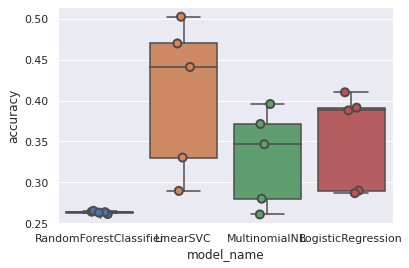

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [87]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.406586
LogisticRegression        0.353279
MultinomialNB             0.330985
RandomForestClassifier    0.263658
Name: accuracy, dtype: float64

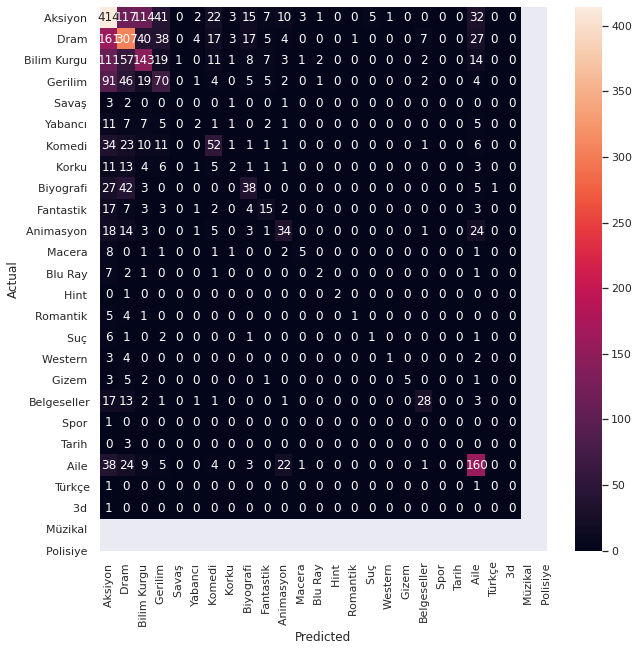

In [88]:
#test verilerini train içerisinden böldük ,0.33 test verisi için ayrılmıştır.
model = LinearSVC()
#df_train = df_train.rename(columns={'oyuncular ': 'oyuncular'})
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_train.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Kategori.values, yticklabels=category_id_df.Kategori.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [89]:
model1 = LinearSVC()
#df_train = df_train.rename(columns={'oyuncular ': 'oyuncular'})
X2_train, X2_test, y2_train, y2_test, indices_train, indices_test = train_test_split(features2, labels2, df_train.index, test_size=0.33, random_state=0)
model1.fit(X2_train, y2_train)
y_pred2 = model1.predict(X2_test)
from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(y2_test, y_pred2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat1, annot=True, fmt='d',
            xticklabels=oyuncu_id_df.oyuncular.values, yticklabels=oyuncu_id_df.oyuncular.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ValueError: Unknown label type: 'continuous'

In [92]:

from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y2_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y2_train))
print(utils.multiclass.type_of_target(y2_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[30 53 54 ... 35 23 43]
continuous
multiclass
multiclass


In [93]:
model.fit(features, labels)
N = 2
for Kategori, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Kategori))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# '3d ':
  . Top unigrams:
       . aykroyd
       . jaime
  . Top bigrams:
       . dan aykroyd
       . anna faris
# 'Aile ':
  . Top unigrams:
       . jayden
       . arnett
  . Top bigrams:
       . joey lawrence
       . ashley jensen
# 'Aksiyon ':
  . Top unigrams:
       . ismail
       . rich
  . Top bigrams:
       . martin lawrence
       . sebastian knapp
# 'Animasyon ':
  . Top unigrams:
       . ori
       . yeo
  . Top bigrams:
       . kevin conroy
       . jake austin
# 'Belgeseller':
  . Top unigrams:
       . penn
       . deng
  . Top bigrams:
       . corey johnson
       . john hurt
# 'Bilim Kurgu ':
  . Top unigrams:
       . melanie
       . stahl
  . Top bigrams:
       . tom payne
       . matt smith
# 'Biyografi ':
  . Top unigrams:
       . camp
       . abel
  . Top bigrams:
       . tom hollander
       . jason clarke
# 'Blu Ray ':
  . Top unigrams:
       . devine
       . sean
  . Top bigrams:
       . kristin davis
       . harris jude
# 'Dram ':
  . To

In [94]:
model1.fit(features, labels)
N = 2
for oyuncular, oyuncu_id in sorted(category_to_id.items()):
  indices = np.argsort(model1.coef_[oyuncu_id])
  feature_names2 = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names2) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names2) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(oyuncular))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


# '3d ':
  . Top unigrams:
       . aykroyd
       . jaime
  . Top bigrams:
       . dan aykroyd
       . anna faris
# 'Aile ':
  . Top unigrams:
       . jayden
       . arnett
  . Top bigrams:
       . joey lawrence
       . ashley jensen
# 'Aksiyon ':
  . Top unigrams:
       . ismail
       . rich
  . Top bigrams:
       . martin lawrence
       . sebastian knapp
# 'Animasyon ':
  . Top unigrams:
       . ori
       . yeo
  . Top bigrams:
       . kevin conroy
       . jake austin
# 'Belgeseller':
  . Top unigrams:
       . penn
       . deng
  . Top bigrams:
       . corey johnson
       . john hurt
# 'Bilim Kurgu ':
  . Top unigrams:
       . melanie
       . stahl
  . Top bigrams:
       . tom payne
       . matt smith
# 'Biyografi ':
  . Top unigrams:
       . camp
       . abel
  . Top bigrams:
       . tom hollander
       . jason clarke
# 'Blu Ray ':
  . Top unigrams:
       . devine
       . sean
  . Top bigrams:
       . kristin davis
       . harris jude
# 'Dram ':
  . To

In [95]:
from sklearn import metrics
metrics.classification_report(y_test, y_pred, target_names=df_train["Kategori"].unique())


ValueError: Number of classes, 24, does not match size of target_names, 26. Try specifying the labels parameter

In [96]:

#metrics.classification_report(y1_test, y_pred1, target_names=df_train["oyuncular"].unique())

ValueError: Number of classes, 24, does not match size of target_names, 5443. Try specifying the labels parameter

In [97]:
#y_pred1

array([3, 0, 0, ..., 0, 1, 0])

In [98]:
df_train

,yildiz,Kategori,oyuncular,yonetmen,category_id,oyuncu_id
0,9,Aksiyon,"Bryce Dallas Howard, Oakes Fegley, Oona Lauren...",David Lowery,0,0
1,8,Aksiyon,"Donnie Yen, Jet Li, Li Gong, Yifei Liu",Niki Caro,0,1
2,9,Dram,"Aleksandr Samoylenko, Mariya Mironova, Pavel D...",Klim Shipenko,1,2
3,8,Bilim Kurgu,"Dacre Montgomery, Ludi Lin, Naomi Scott, RJ Cyler",Dean Israelite,2,3
4,8,Dram,"Douglas M. Griffin, James DuMont, Kurt Russell...",Peter Berg,1,4
...,...,...,...,...,...,...
9056,7,Aksiyon,"Benjamin Bratt, Christa Miller, Louis Ferreira...",missing,0,5134
9057,9,Aksiyon,"Eric Bana, Jennifer Connelly, Josh Lucas, Sam ...",Ang Lee,0,4726
9058,6,Aksiyon,"Ananda Everingham, Jonathan Hallman, Wannasing...",Wisit Sasanatieng,0,4727
9059,8,Aksiyon,"Carrie Henn, Michael Biehn, Paul Reiser, Sigou...",James Cameron,0,4730


In [99]:
import pickle
import pickle as p

filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
modelfile = '/home/melek/PycharmProjects/Scrapy-FlaskProject/model.pkl'
model = p.load(open(modelfile, 'rb'))


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))


pd.get_dummies(loaded_model)
result = loaded_model.score(X1_test, y1_test)
print(result)

In [2]:

filename2 = 'model2.pkl'
pickle.dump(model1, open(filename2, 'wb'))



NameError: name 'pickle' is not defined

In [1]:

loaded_model2 = pickle.load(open(filename2, 'rb'))


pd.get_dummies(loaded_model2)
result = loaded_model2.score(X1_test, y1_test)
print(result)




SyntaxError: invalid syntax (<ipython-input-1-ba0a393b9112>, line 4)

In [4]:
"""from jupyter_spaces import get_spaces

spaces = get_spaces()
space = spaces[<space-name>]
reference = space.namespace[<reference-name>]"""


SyntaxError: invalid syntax (<ipython-input-4-290c642e5016>, line 4)